<a href="https://colab.research.google.com/github/denisecammarota/d2ai-notes/blob/main/ch3_d2ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


# Linear regression with synthetic data and minibatch GD

## Generating the data that will be used

In [ ]:
X = torch.randn(1000, 2) # a feature matrix of 1000 x 2 (1000 instances, 2 features)
w = torch.tensor([2, -3.4]) # matrix of weights
b = torch.tensor([4.2]) # bias
eps = torch.randn(1000, 1) # errors
y = torch.matmul(X, w.reshape((-1, 1))) + b + eps

## Defining the dataset and the dataloader for SGD

In [ ]:
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size = 32, shuffle = True)

## Defining the model (linear regression) using Pytorch

In [ ]:
class LinearRegression(nn.Module):

  def __init__(self):
      super().__init__()
      self.linear = nn.LazyLinear(out_features = 1)

  def forward(self, x):
    return self.linear(x)

## Fitting with minibatch GD

In [ ]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

n_epochs = 100
loss_epochs = []


for epoch in range(n_epochs):
  for batch_X, batch_y in loader:
    optimizer.zero_grad()
    output = model(batch_X)
    loss = criterion(output, batch_y)
    loss.backward()
    optimizer.step()
  loss_epochs.append(loss.item())
  if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 10, Loss: 0.4097
Epoch 20, Loss: 0.5748
Epoch 30, Loss: 0.7505
Epoch 40, Loss: 0.3610
Epoch 50, Loss: 1.0087
Epoch 60, Loss: 1.2458
Epoch 70, Loss: 1.4170
Epoch 80, Loss: 1.2472
Epoch 90, Loss: 0.7942
Epoch 100, Loss: 0.3914


Text(0, 0.5, 'Loss (MSE($y, y_m$))')

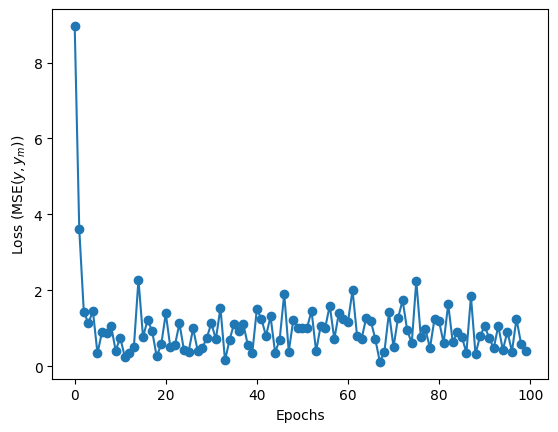

In [ ]:
plt.plot(range(n_epochs), loss_epochs, '-o')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE($y, y_m$))')

## Visualizing which are the parameters we have as a result

In [ ]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[ 1.9927, -3.4180]], requires_grad=True)
Parameter containing:
tensor([4.1900], requires_grad=True)


## Plotting results against ground truth

Text(0, 0.5, 'Model y')

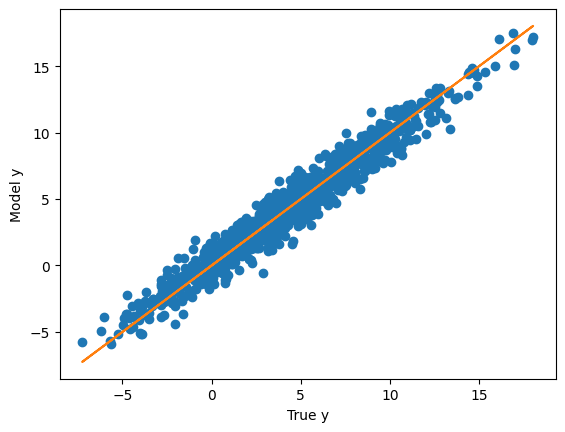

In [ ]:
plt.plot(y, model(X).detach().cpu().numpy(), 'o')
plt.plot(y, y)
plt.xlabel('True y')
plt.ylabel('Model y')